In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

   work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid     

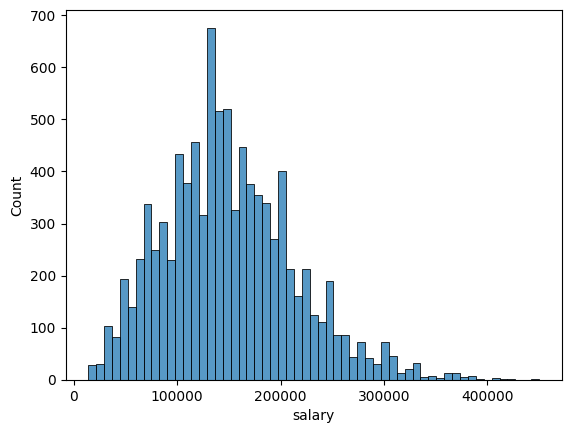

In [24]:
import pandas as pd

# Charger le dataset
df = pd.read_csv("/kaggle/input/jobs-in-data/jobs_in_data.csv")

# Afficher les premières lignes du dataset
print(df.head())
# Statistiques descriptives
df = df.dropna()
print(df.describe())
# Exemple de graphique (histogramme)
sns.histplot(df['salary'])
plt.show()


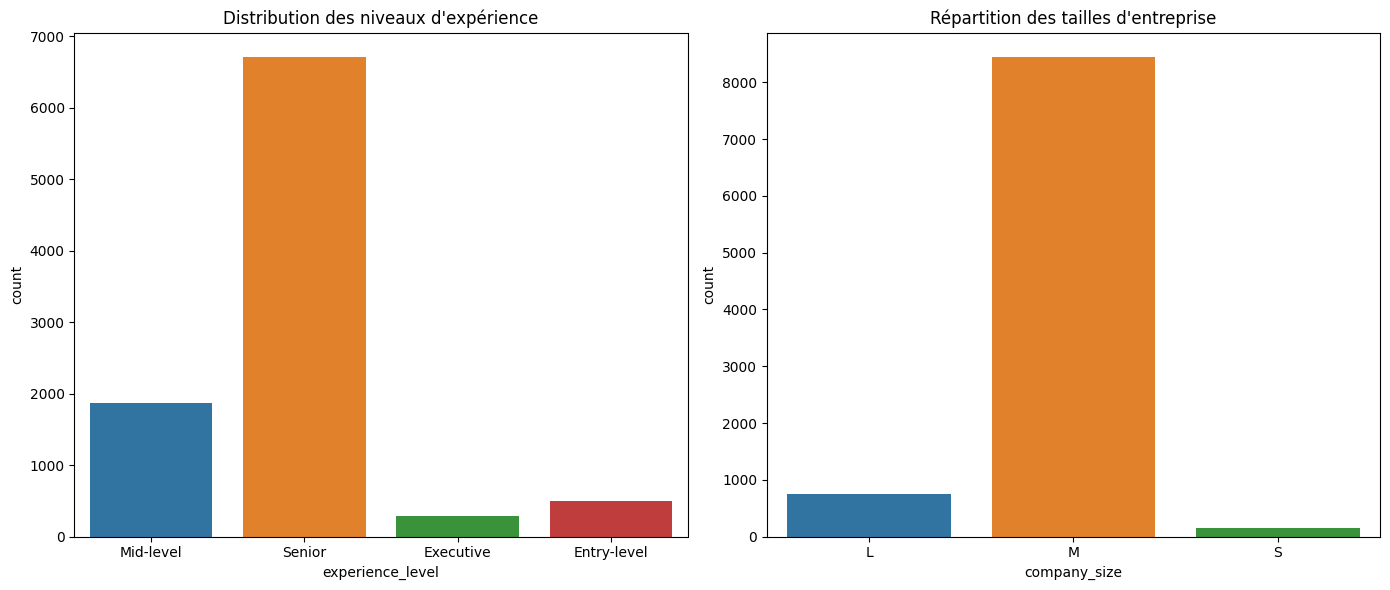

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns



# Créer une grille de sous-graphiques (1 ligne, 2 colonnes)
fig, ax_array = plt.subplots(1, 2, figsize=(14, 6))

# Graphique 1 - Distribution des salaires
sns.countplot(x='experience_level', data=df, ax=ax_array[0])
ax_array[0].set_title('Distribution des niveaux d\'expérience')

# Graphique 2 - Répartition des emplois par catégorie
sns.countplot(x='company_size', data=df, ax=ax_array[1])
ax_array[1].set_title('Répartition des tailles d\'entreprise')

# Ajustements supplémentaires si nécessaire
plt.tight_layout()

# Afficher les graphiques
plt.show()


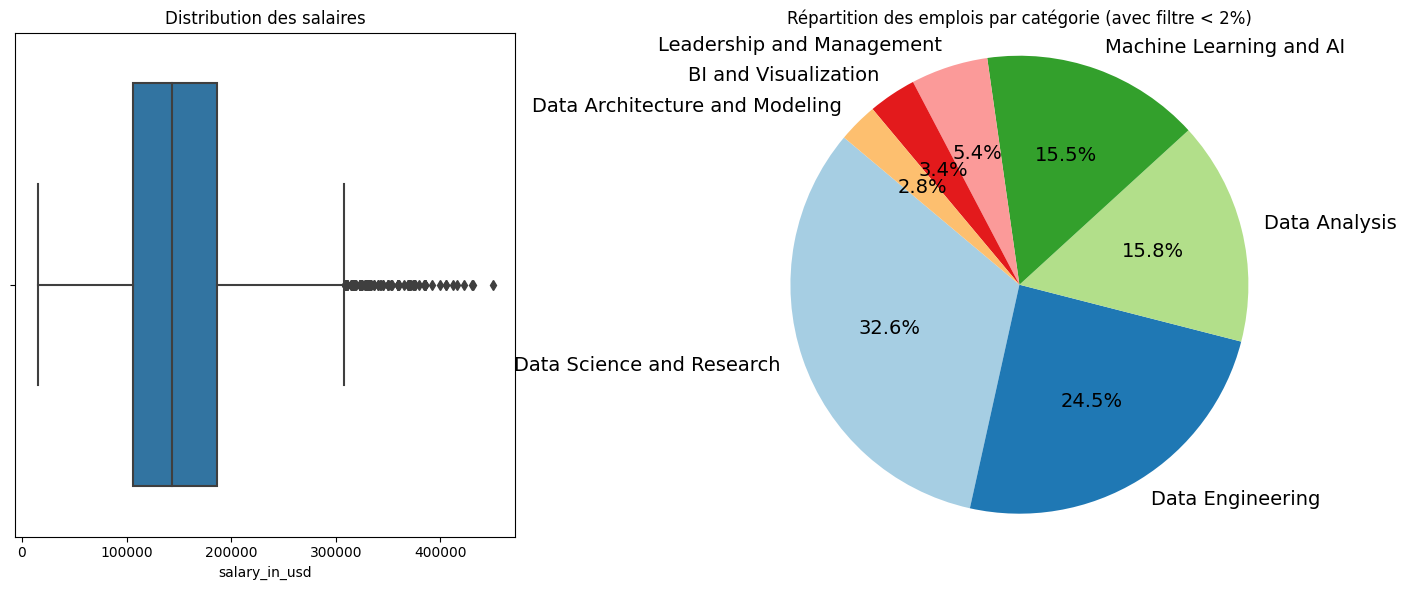

In [27]:
# Compter le nombre d'emplois dans chaque catégorie


# Créer une grille de sous-graphiques (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique 1 - Distribution des salaires
sns.boxplot(x='salary_in_usd', data=df, ax=axes[0])
axes[0].set_title('Distribution des salaires')

# Graphique 2 - Répartition des emplois par catégorie
# Compter le nombre d'emplois dans chaque catégorie
job_category_counts = df['job_category'].value_counts()

# Filtrer les catégories qui représentent moins de 2% du total
threshold_percentage = 2
filtered_job_category_counts = job_category_counts[job_category_counts / job_category_counts.sum() * 100 >= threshold_percentage]

# Créer un graphique en secteurs
axes[1].pie(filtered_job_category_counts, labels=filtered_job_category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, textprops={'fontsize': 14})
axes[1].axis('equal')  # Assure une forme de cercle
axes[1].set_title('Répartition des emplois par catégorie (avec filtre < 2%)')

# Ajustements supplémentaires si nécessaire
plt.tight_layout()

# Afficher les graphiques
plt.show()




In [ ]:
df_encoded = pd.get_dummies(df)
correlation_matrix = df_encoded.corr()

# Créer un heatmap avec la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

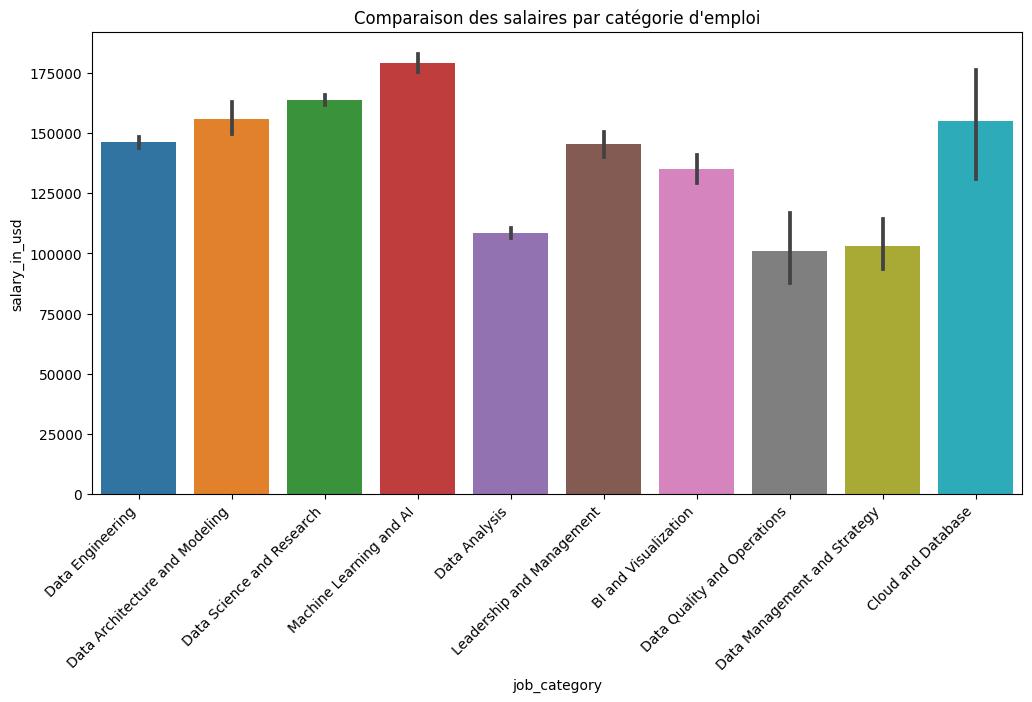

In [43]:

import seaborn as sns
import matplotlib.pyplot as plt

# Exemple de graphique à barres pour comparer les salaires par catégorie d'emploi
plt.figure(figsize=(12, 6))
sns.barplot(x='job_category', y='salary_in_usd', data=df)
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Comparaison des salaires par catégorie d\'emploi')
plt.show()



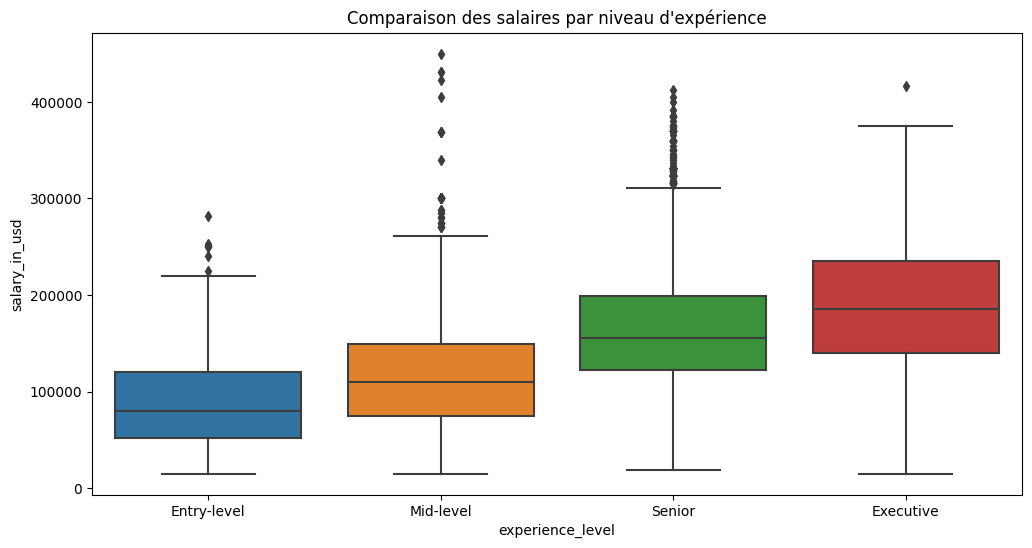

In [44]:
# Exemple de graphique à boîtes à moustaches pour comparer les salaires par niveau d'expérience
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['Entry-level', 'Mid-level', 'Senior', 'Executive'])
plt.title('Comparaison des salaires par niveau d\'expérience')
plt.show()
